# **Distribution Network Analysis: Capacity Planning for Electric Vehicle (EV) using Python**

**Company - POWER CHARGE UTILITIES**

## **Business Problems**
1. Increase load demand
2. Grid Overload
3. Customer Satisfaction
4. Cost Management

## **Rationale for the Project**
1. Customer Retention
2. Revenue Growth
3. Sustainability Goal
4. Regulatory Compliance
5. Technological Innovation


## **Aim of the Project** - Capacity Planning for Electric Vehicle (EV)
The project aim to achieve the following objectives:
1. **Access Network Capacity** - Conduct a comprehensive analysis of the duistribution network's current capacity to handle increased load from EV charging stations
2. **Identify Bottleneck** - Identify potential bootlenecks and vulnerabilities within the distribution netwrok
3. **Optimize Network Upgrades** - Develop a data driven strategy for network upgrades that maximizes efficiency

In [1]:
#import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Load the dataset
Distribution_Data = pd.read_csv('/content/drive/MyDrive/EV ANALYSIS/ev_distribution_dataset.csv')
Geospatial_Data = pd.read_csv('/content/drive/MyDrive/EV ANALYSIS/geospatial_dataset.csv')
Weather_Data = pd.read_csv('/content/drive/MyDrive/EV ANALYSIS/weather_dataset.csv')

In [3]:
Weather_Data.columns

Index(['Timestamp', 'Temperature (°C)', 'Precipitation (mm)',
       'Weather_Conditions', 'Substation_ID'],
      dtype='object')

In [4]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [5]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [6]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [7]:
Distribution_Data.info()

Distribution_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [8]:
Geospatial_Data.info()

Geospatial_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [9]:
Weather_Data.info()

Weather_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


## **Exploratory Data Analysis**

**This session involves both Univariate and Bivariate Analysis**

### **Univariate Analysis**
1.   Visualize the distribution of electric consumption
2.   Analyze the distribution of EV types, charging habit and consumption type.

### **Bivariate Analysis**
1.   Use geospatial data to visualize the locations of substations and EV charging stations
2.   Analyze the Capacity of transmission lines







### **Univariate Analysis**

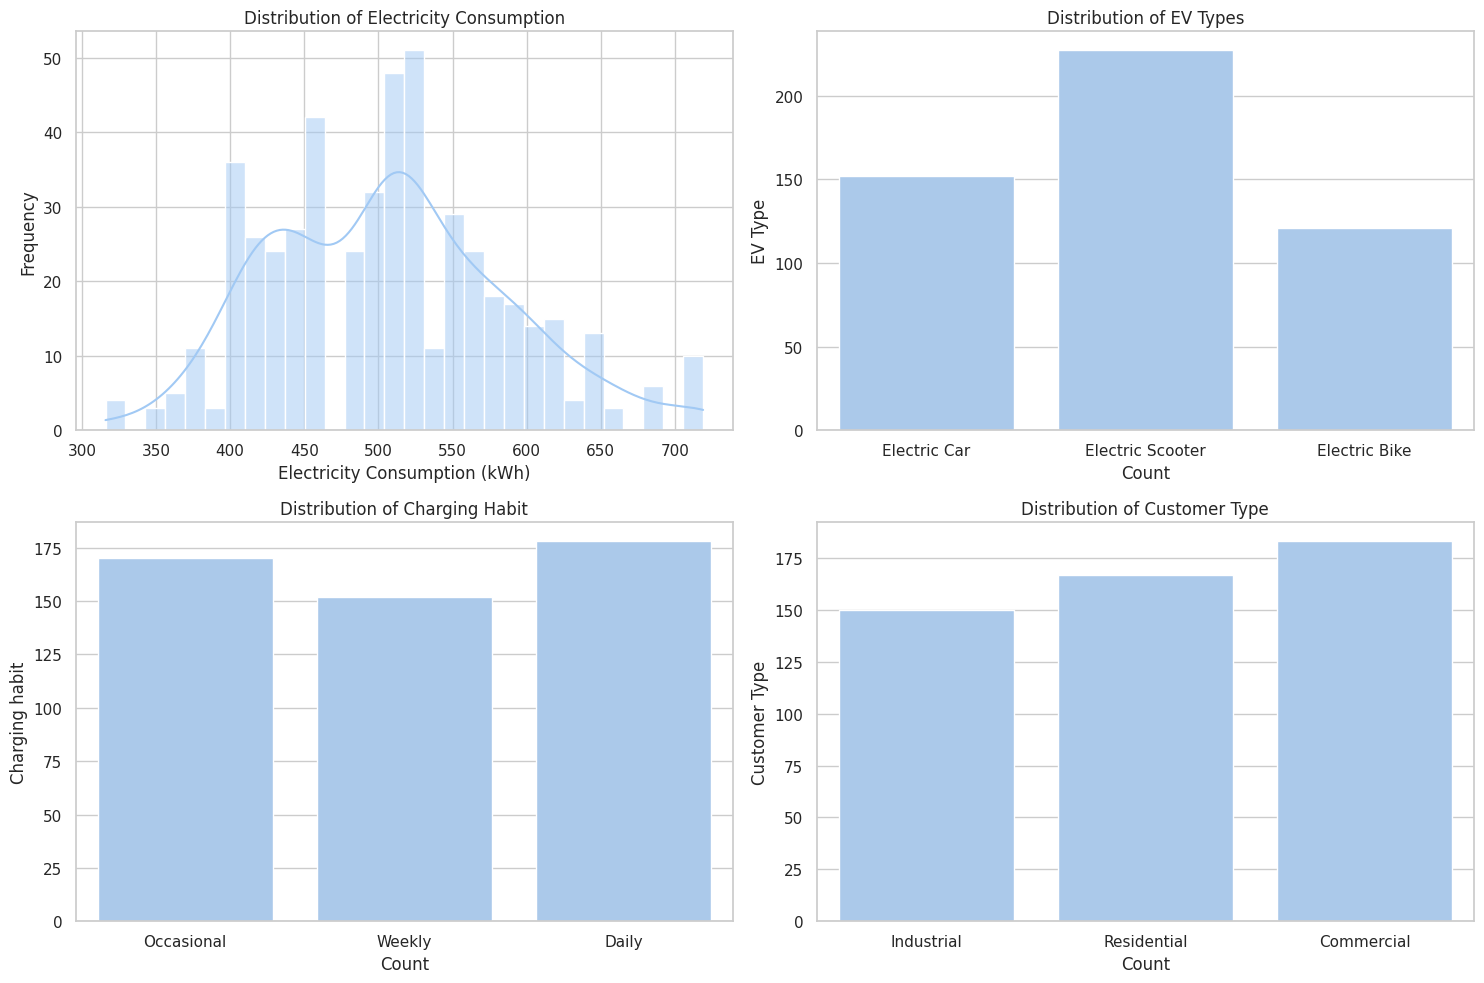

In [10]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

#create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#plot the distribution of electricity consumption
sns.histplot(data= Distribution_Data, x='Electricity_Consumption (kWh)', bins= 30, kde=True, ax=axes[0, 0])
axes[0,0].set_title('Distribution of Electricity Consumption')
axes[0,0].set_xlabel('Electricity Consumption (kWh)')
axes[0,0].set_ylabel('Frequency')

#plot the distribution of EV types
sns.countplot(data= Distribution_Data, x='EV_Type', ax=axes[0, 1])
axes[0,1].set_title('Distribution of EV Types')
axes[0,1].set_xlabel('Count')
axes[0,1].set_ylabel('EV Type')

#plot the distribution of the Charging habit
sns.countplot(data= Distribution_Data, x='Charging_Habit', ax=axes[1, 0])
axes[1,0].set_title('Distribution of Charging Habit')
axes[1,0].set_xlabel('Count')
axes[1,0].set_ylabel('Charging habit')

#plot the distribution of the Customer type
sns.countplot(data= Distribution_Data, x='Customer_Type', ax=axes[1, 1])
axes[1,1].set_title('Distribution of Customer Type')
axes[1,1].set_xlabel('Count')
axes[1,1].set_ylabel('Customer Type')

plt.tight_layout()
plt.show()

### **Bivariate Analysis**

In [11]:
#Extract the Lat and Long of EV charging location
Distribution_Data['EV_latitude'] = Distribution_Data['EV_Charging_Station_Location'].apply(lambda x: float(x.split(',')[0].replace("(", "").strip()))
Distribution_Data['EV_longitude'] = Distribution_Data['EV_Charging_Station_Location'].apply(lambda x: float(x.split(',')[1].replace(")", "").strip()))

#Extract the Lat and Long of EV charging substation location
Geospatial_Data['substation_latitude'] = Geospatial_Data['Substation_Location'].apply(lambda x: float(x.split(',')[0].replace("(", "").strip()))
Geospatial_Data['substation_longitude'] = Geospatial_Data['Substation_Location'].apply(lambda x: float(x.split(',')[1].replace(")", "").strip()))

#Drop the original location columns to clean up the dataframe
Distribution_Data = Distribution_Data.drop(columns=['EV_Charging_Station_Location'], axis=1)
Geospatial_Data = Geospatial_Data.drop(['Substation_Location'], axis=1)


In [12]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,EV_latitude,EV_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [13]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


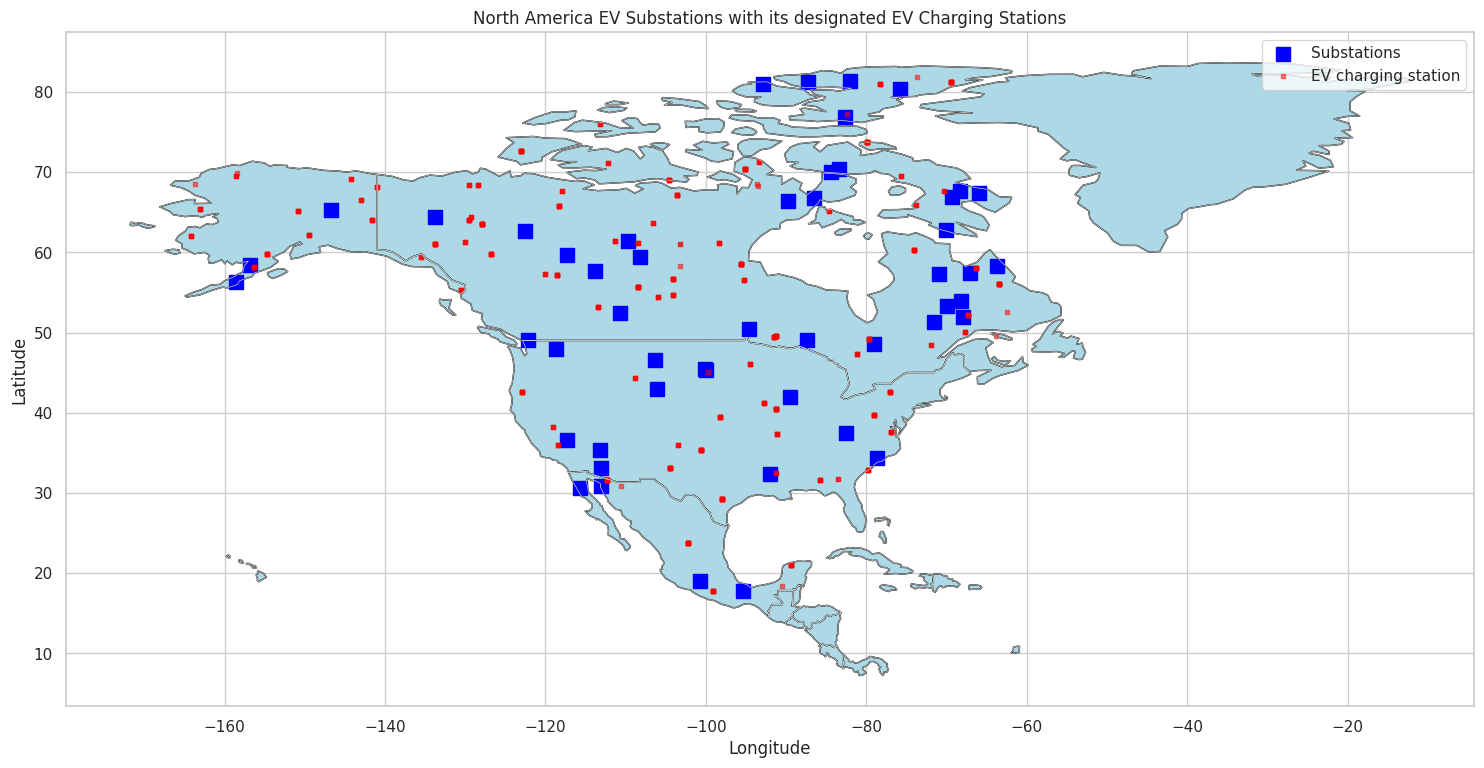

In [14]:
#Convert the Dataframes into Geodataframes
EV_gdf = gpd.GeoDataFrame(Distribution_Data, geometry=gpd.points_from_xy(Distribution_Data.EV_longitude, Distribution_Data.EV_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data, geometry=gpd.points_from_xy(Geospatial_Data.substation_longitude, Geospatial_Data.substation_latitude))

#Load the world map data
world = gpd.read_file("/content/drive/MyDrive/EV ANALYSIS/ne_110m_admin_0_countries.shp")


#Zoom in to North America (area of focus)
north_america = world[world.CONTINENT == 'North America']

#plotting the map for north america
fig, ax = plt.subplots(figsize=(15, 10))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='lightgrey')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, color='blue', marker='s', markersize=100, label='Substations')

#plotting the EV charging stations
EV_gdf.plot(ax=ax, color='red', marker='s', markersize=10, label='EV charging station', alpha=0.5)

#set title
plt.title('North America EV Substations with its designated EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.tight_layout()
plt.show()


In [15]:
from shapely.geometry import LineString

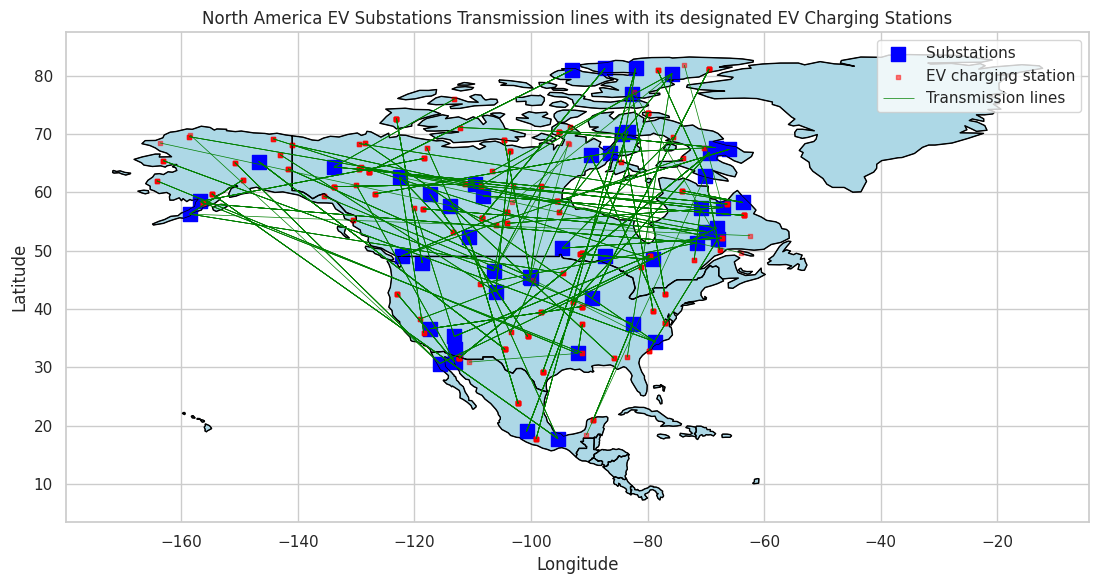

In [16]:
#Convert the Dataframes into Geodataframes
EV_gdf = gpd.GeoDataFrame(Distribution_Data, geometry=gpd.points_from_xy(Distribution_Data.EV_longitude, Distribution_Data.EV_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data, geometry=gpd.points_from_xy(Geospatial_Data.substation_longitude, Geospatial_Data.substation_latitude))

#Connect each substation to its EV charging stations
lines = []
for _, ev_row in Distribution_Data.iterrows():
  substation = Geospatial_Data[Geospatial_Data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
  line = [(ev_row['EV_longitude'], ev_row['EV_latitude']), (substation['substation_longitude'], substation['substation_latitude'])]
  lines.append(line)

line_gdf = gpd.GeoDataFrame(geometry=[LineString(line)for line in lines])

#Load the world map data
world = gpd.read_file("/content/drive/MyDrive/EV ANALYSIS/ne_110m_admin_0_countries.shp")


#Zoom in to North America (area of focus)
north_america = world[world.CONTINENT == 'North America']

#plotting the map for north america
fig, ax = plt.subplots(figsize=(16, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, color='blue', marker='s', markersize=100, label='Substations')

#plotting the EV charging stations
EV_gdf.plot(ax=ax, color='red', marker='s', markersize=10, label='EV charging station', alpha=0.5)

#plotting the Transmission lines of the substations
line_gdf.plot(ax=ax, color='green', linewidth=0.5, label='Transmission lines')

#set title
plt.title('North America EV Substations Transmission lines with its designated EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.tight_layout()
plt.show()

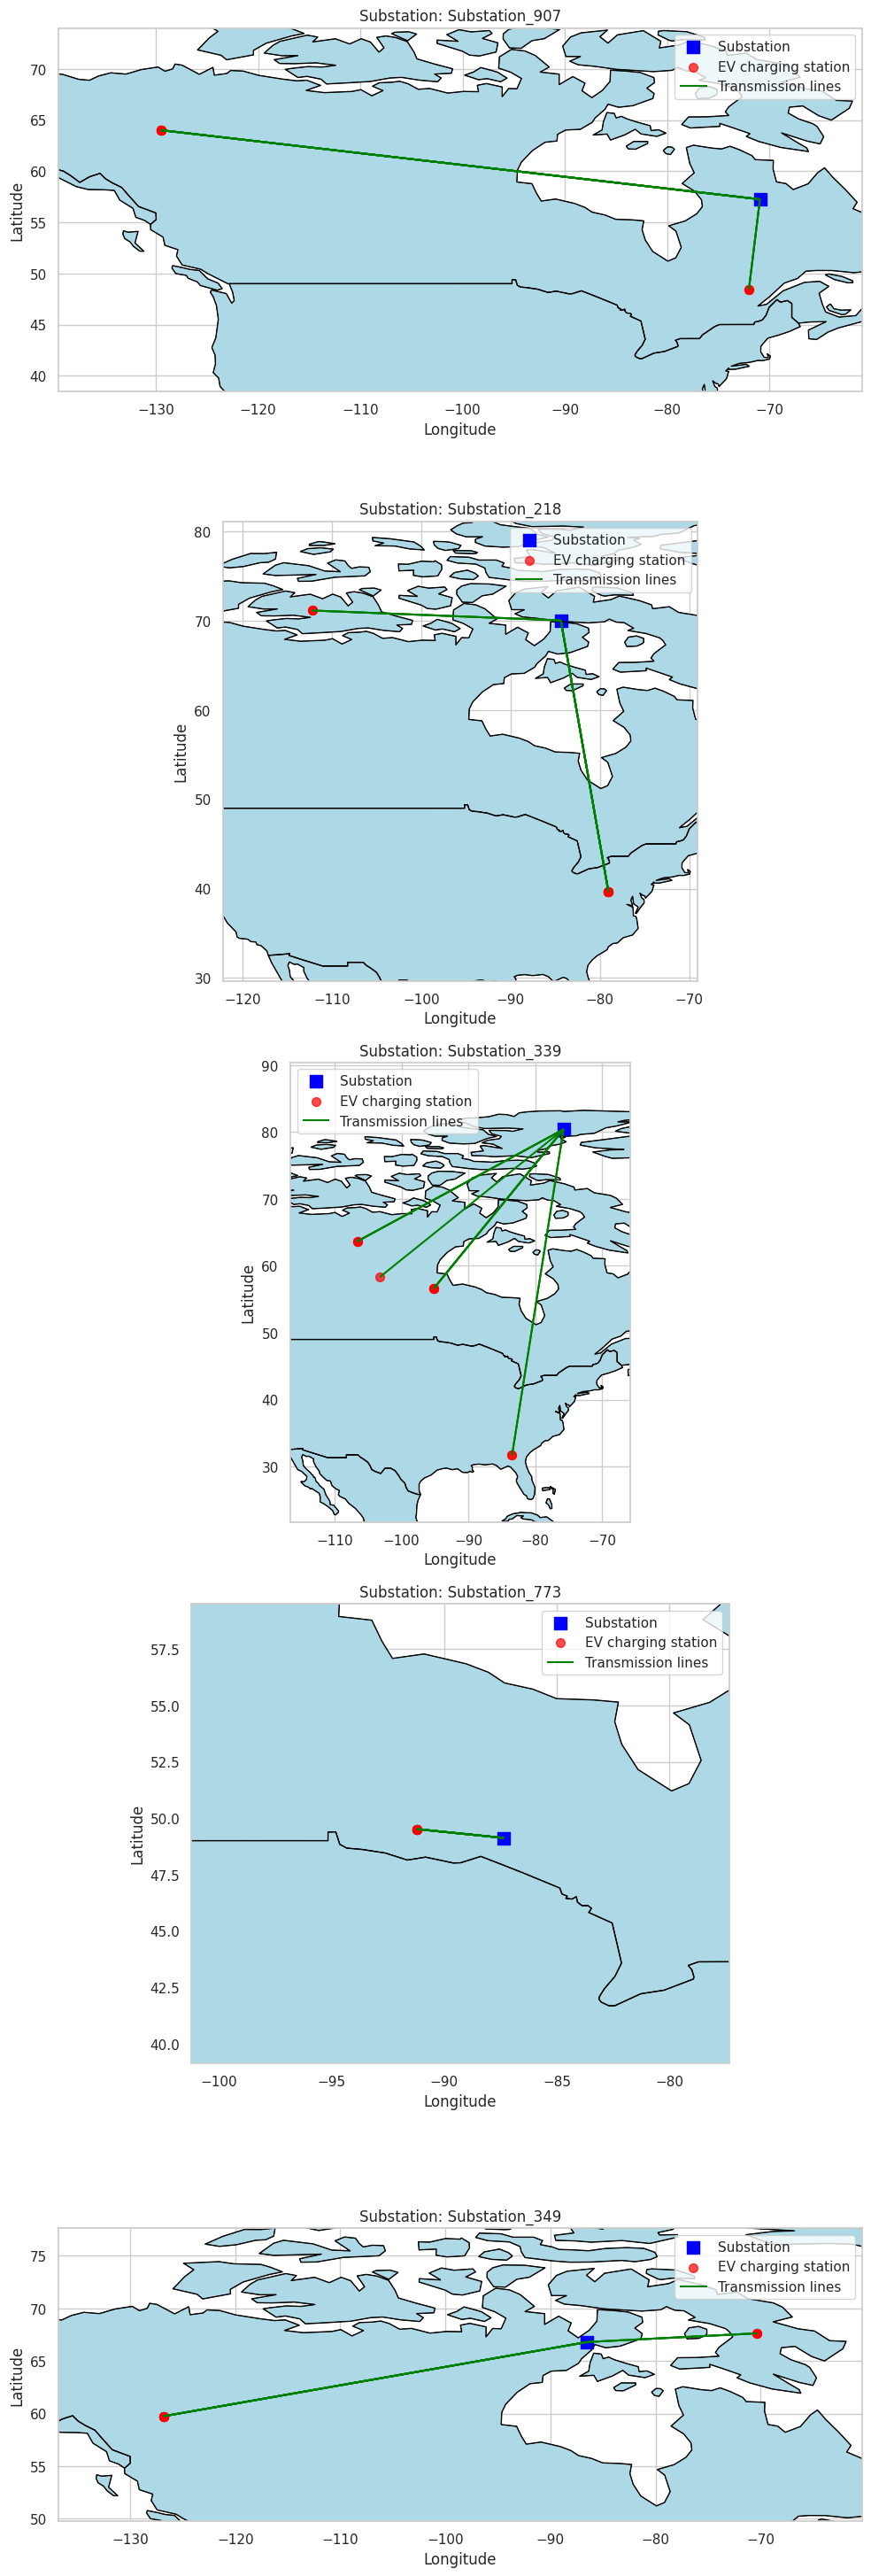

In [17]:
#Select multiple substations by index or ID
selected_substations = Geospatial_Data.iloc[[0, 1, 2, 3, 4]]  # Replace with actual indices or filter by ID

#Prepare subplots: one row for each substation
fig, axes = plt.subplots(nrows=len(selected_substations), figsize=(10, 6 * len(selected_substations)))

#for one substation per row, wrap axis in list for consistent looping
if len(selected_substations) == 1:
    axes = [axes]

buffer = 10  # Degree

#Loop through each substation
for i, (_, substation) in enumerate(selected_substations.iterrows()):
    # Filter associated EV stations
    associated_EV = Distribution_Data[Distribution_Data['Substation_ID'] == substation['Substation_ID']]

    #convert to Geodataframe
    ev_gdf_selected = gpd.GeoDataFrame(associated_EV, geometry=gpd.points_from_xy(associated_EV.EV_longitude, associated_EV.EV_latitude))
    from shapely.geometry import Point # Import Point
    substation_gdf_selected = gpd.GeoDataFrame([substation], geometry=gpd.points_from_xy([substation['substation_longitude']], [substation['substation_latitude']]))

    #Transmission lines
    lines = [(ev_row['EV_longitude'], ev_row['EV_latitude'], substation['substation_longitude'], substation['substation_latitude']) for _, ev_row in associated_EV.iterrows()]
    line_gdf = gpd.GeoDataFrame(geometry=[LineString([(l[0], l[1]), (l[2], l[3])]) for l in lines])

    #determining the bounding box for the zoomed in area
    north_america.boundary.plot(ax=axes[i], linewidth=0.5, color='black')
    north_america.plot(ax=axes[i], color='lightblue', edgecolor='black')

    #plotting the substations on the map
    substation_gdf_selected.plot(ax=axes[i], color='blue', marker='s', markersize=100, label='Substation')
    #plotting the EV charging stations
    ev_gdf_selected.plot(ax=axes[i], color='red', marker='o', markersize=50, label='EV charging station', alpha=0.7)
    #plotting the Transmission lines of the substations
    line_gdf.plot(ax=axes[i], color='green', linewidth=1.5, label='Transmission lines')

    #Set bounding box for zoom
    minx, miny, maxx, maxy = line_gdf.total_bounds
    axes[i].set_xlim([minx - buffer, maxx + buffer])
    axes[i].set_ylim([miny - buffer, maxy + buffer])

    #Labels and title
    axes[i].set_title(f"Substation: {substation['Substation_ID']}")
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [18]:
#zoom in to each substations for better visibility
selected_substation = Geospatial_Data.iloc[5]
associated_EV = Distribution_Data[Distribution_Data['Substation_ID']== selected_substation['Substation_ID']]

# Create geometry for substation and EVs
substation_point = Point(selected_substation['substation_longitude'], selected_substation['substation_latitude'])
ev_points = [Point(xy) for xy in zip(associated_EV.EV_longitude, associated_EV.EV_latitude)]

# Create GeoDataFrames
ev_gdf = gpd.GeoDataFrame(associated_EV, geometry=ev_points, crs="EPSG:4326")
substation_gdf = gpd.GeoDataFrame([selected_substation], geometry=[substation_point], crs="EPSG:4326")

# Convert to a projected CRS (e.g., UTM or Mercator) for accurate distance in meters
ev_gdf_proj = ev_gdf.to_crs(epsg=3857)
substation_gdf_proj = substation_gdf.to_crs(epsg=3857)

# Calculate distance to substation
substation_geom = substation_gdf_proj.geometry.iloc[0]
ev_gdf_proj["Distance_to_Substation_m"] = ev_gdf_proj.geometry.distance(substation_geom)

# Display result
ev_gdf_proj[["Substation_ID", "EV_longitude", "EV_latitude", "Distance_to_Substation_m"]]


,Substation_ID,EV_longitude,EV_latitude,Distance_to_Substation_m
50,Substation_752,-108.49207,55.62966,9.248690e+06
51,Substation_752,-108.49207,55.62966,9.248690e+06
52,Substation_752,-108.49207,55.62966,9.248690e+06
53,Substation_752,-108.49207,55.62966,9.248690e+06
54,Substation_752,-108.49207,55.62966,9.248690e+06
55,Substation_752,-108.49207,55.62966,9.248690e+06
56,Substation_752,-108.49207,55.62966,9.248690e+06
57,Substation_752,-108.49207,55.62966,9.248690e+06
58,Substation_752,-108.49207,55.62966,9.248690e+06
59,Substation_752,-108.49207,55.62966,9.248690e+06


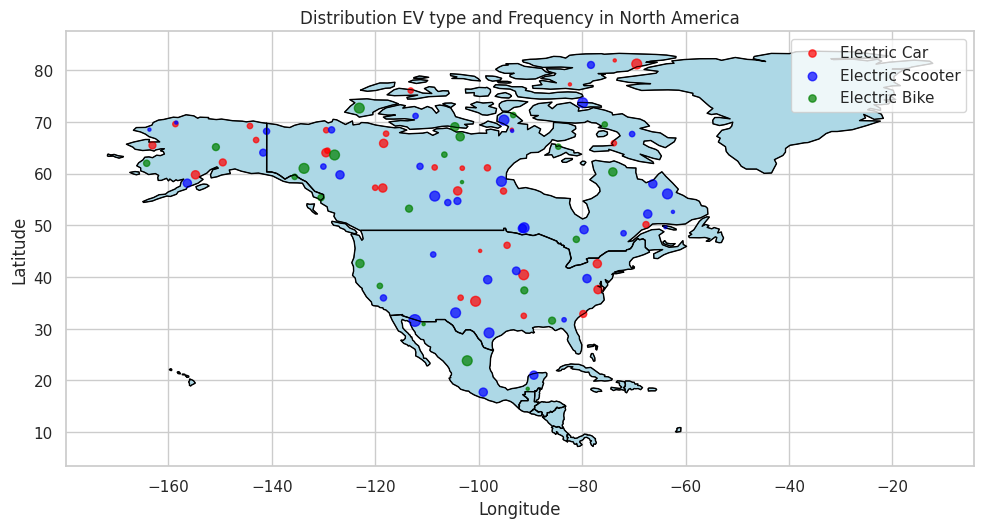

In [19]:
#groupby location and the ev type, then count the number of substation
grouped_data = Distribution_Data.groupby(['EV_latitude', 'EV_longitude', 'EV_Type']).size().reset_index(name='Count')

#convert the grouped data in GeoDataframe
grouped_gdf = gpd.GeoDataFrame(grouped_data, geometry=gpd.points_from_xy(grouped_data.EV_longitude, grouped_data.EV_latitude))

#Load the world map data
world = gpd.read_file("/content/drive/MyDrive/EV ANALYSIS/ne_110m_admin_0_countries.shp")

#Zoom in to North America (area of focus)
north_america = world[world.CONTINENT == 'North America']

#plotting the map for north america
fig, ax = plt.subplots(figsize=(10, 8))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

#define the colour of the EV type
colors= {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

#plotting EV type
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, color=color, marker='o', markersize=sub_gdf['Count']*5, label=ev_type, alpha = 0.7)

#set title
plt.title('Distribution EV type and Frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.tight_layout()
plt.show()

## **Network Capacity Assessment**

**To perform Network Capacity Assessment**


1.   Calculate the Total Electricity Consumption for each substation
2.   Compare the Total Electricity Consumption with the transmission line capacity



In [20]:
#group the ev distribution data by substation id and calculate the total electricity consumption for each substation
total_consumption_per_substation = Distribution_Data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#merge the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on='Substation_ID')

network_capacity_data.rename(columns={'Electricity_Consumption (kWh)': 'Total_Electricity_Consumption (kWh)'}, inplace=True)

#Calculating the ratio of total consumption to transmission line Capacity
#the conversion rate of 1MW = 1000 kWh
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Electricity_Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)'] *1000)

In [21]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


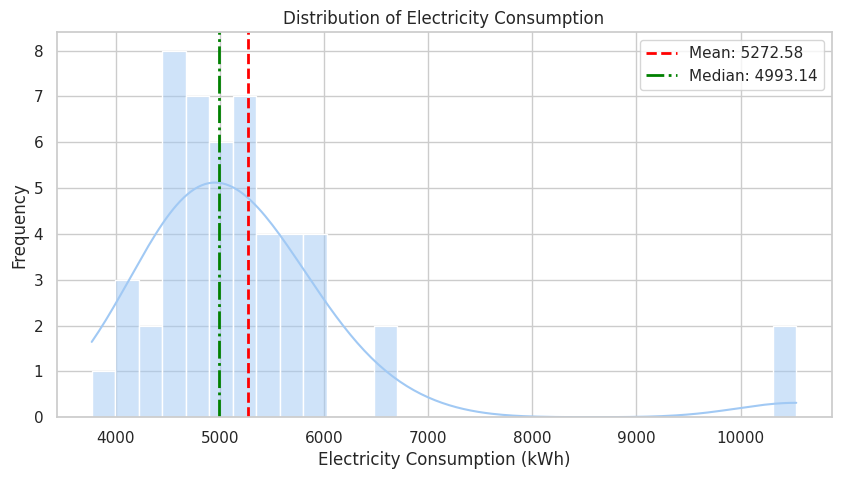

In [22]:
# mean and median calculation
mean_val = network_capacity_data['Total_Electricity_Consumption (kWh)'].mean()
median_val = network_capacity_data['Total_Electricity_Consumption (kWh)'].median()

# histogram plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=network_capacity_data, x='Total_Electricity_Consumption (kWh)', bins=30, kde=True, ax=ax)

# mean line
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
# median line
ax.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')

ax.set_title('Distribution of Electricity Consumption')
ax.set_xlabel('Electricity Consumption (kWh)')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

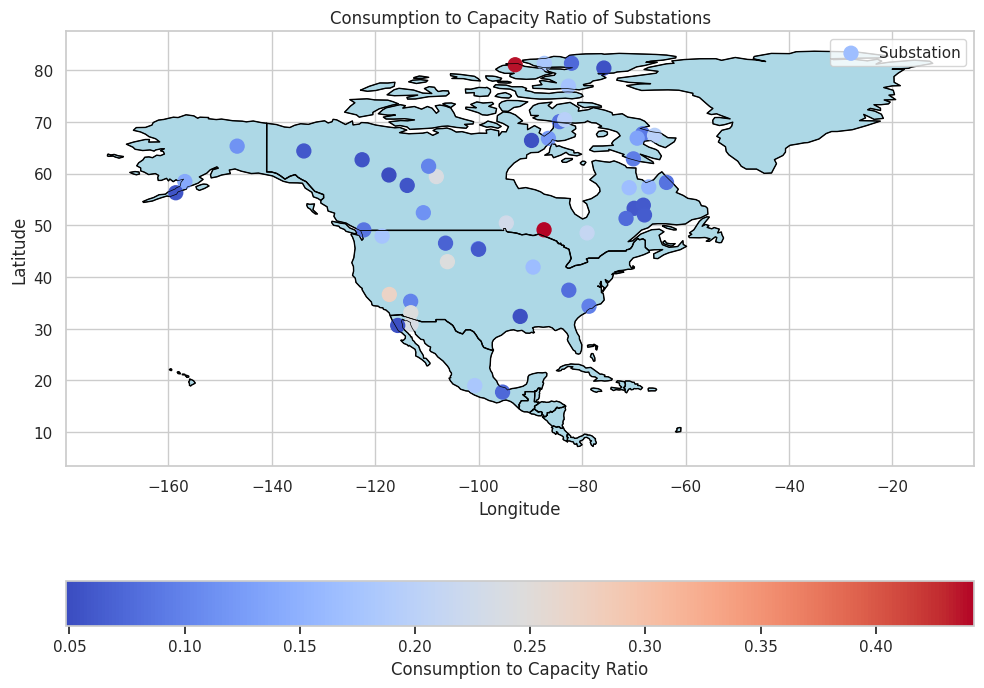

In [23]:
#create the GeoDataframe for the network capacity
geometry_network_capacity = [Point(long, lat) for long, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

#plotting in choropleth style
fig, ax = plt.subplots(figsize=(10, 8))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')
gdf_network_capacity.plot(column= 'Consumption_to_Capacity_Ratio', ax=ax, cmap='coolwarm', legend=True, marker='o', markersize=100, label='Substation', legend_kwds={'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"})

#set title
plt.title('Consumption to Capacity Ratio of Substations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()
plt.tight_layout()
plt.show()

In [24]:
#how many evs are connected to each substation
ev_count_per_substation = Distribution_Data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#merge the network capacity data with the EV count
network_capacity_ev_count = pd.merge(ev_count_per_substation, network_capacity_data, on='Substation_ID')

#correlation
correlation_matrix = network_capacity_ev_count['Number_of_EVs'].corr(network_capacity_ev_count['Consumption_to_Capacity_Ratio'])
print(correlation_matrix)

-0.10944923035990646


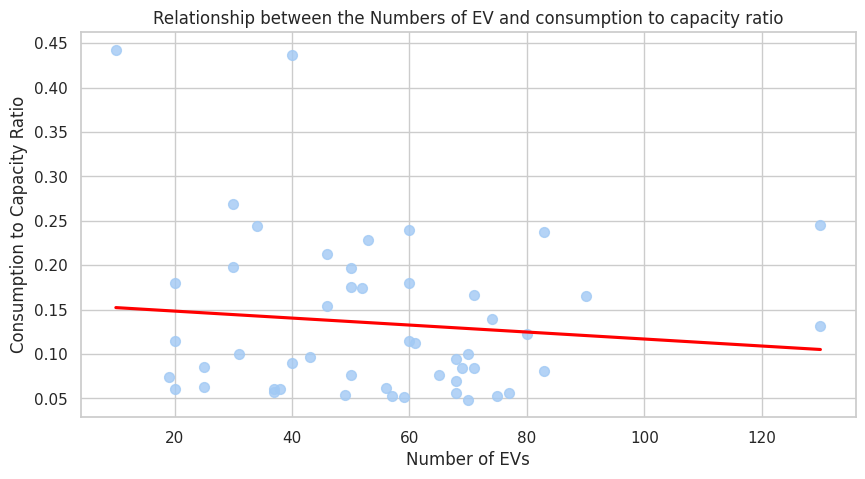

In [25]:
#scatter plot with regression line
plt.figure(figsize =(10, 5))
sns.regplot(x='Number_of_EVs', y='Consumption_to_Capacity_Ratio', data= network_capacity_ev_count, line_kws={'color': 'red'}, scatter_kws={'s':50}, ci= None)
plt.title('Relationship between the Numbers of EV and consumption to capacity ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.show()

## **Identify Bottlenecks**

*   By analyzing the map, we can identify the substations and the areas that are potential bottle necks in the distribution network. These are areas where the consumption are high




In [26]:
#filtering the c2c greater than 1
bottleneck_substations = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio'] >= 0.9]


In [27]:
#Display value
bottleneck_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption (kWh),Consumption_to_Capacity_Ratio




* **There are no substations with Consumption_to_Capacity_Ratio >= 0.9. But it is expedient that careful inspection should be carried out for those substation whose markers are far into the extreme of the spectrum. Those substation have the potential of overloading.**




## **Optimizing Network Upgrades:**
For optimizing network upgrades, focus on substations with potential to have high Consumption_to_Capacity_Ratio. Upgrading the transmission lines or adding additional capacity in these areas can hlp in managing the potential to have increased load effectively and nsure grid reliability.

Aditionally, lets note from the analysis;


*   The Geographical distribution of EV substations; where EV charging stations ar quite far from the substations.

Also, let the business look into;

*   Potential future growth in EV adoption in different areas.

*   Costs associated with different upgrade options.





In [28]:
#Top 5 substations with the potential to overload
top_5_substations = network_capacity_data.sort_values(by='Consumption_to_Capacity_Ratio', ascending=False).head(5)
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
26,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
46,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
41,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


In [29]:
top_5_Transmission_Line_Capacity = network_capacity_data.sort_values(by='Transmission_Line_Capacity (MW)', ascending=False).head(5)
top_5_Transmission_Line_Capacity

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Electricity_Consumption (kWh),Consumption_to_Capacity_Ratio
44,Substation_717,94,51.991072,-67.941831,5883.297430,0.062588
16,Substation_321,93,66.396314,-89.780645,4808.167154,0.051701
30,Substation_240,89,30.624363,-115.659515,4687.373081,0.052667
33,Substation_516,88,62.661470,-122.541751,4912.512816,0.055824
43,Substation_74,86,56.283340,-158.573909,4844.978138,0.056337


## **Correlation with Weather Data**

In [30]:
# Merge weather data with distribution data
merged_data = pd.merge(Weather_Data, Distribution_Data, on=['Timestamp', 'Substation_ID'])

# Calculate the correlation between wather condition and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

# Display the correlation matrix
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


Text(0, 0.5, 'Electricity Consumption (kWh)')

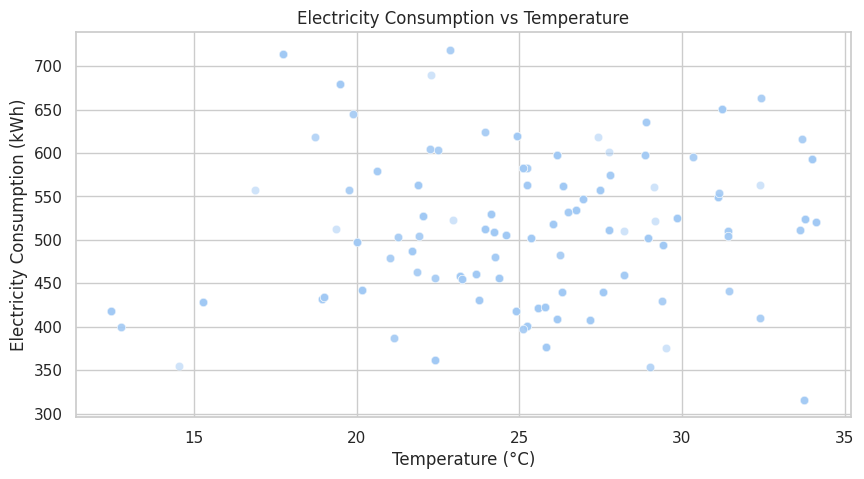

In [31]:
# Electricity consumption vs temp
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x='Temperature (°C)', y='Electricity_Consumption (kWh)', alpha=0.5)
plt.title('Electricity Consumption vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Consumption (kWh)')

Text(0, 0.5, 'Electricity Consumption (kWh)')

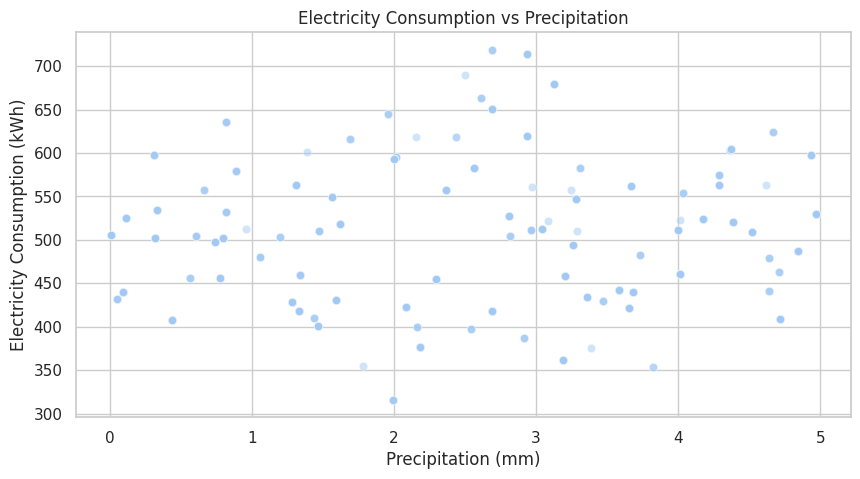

In [32]:
# Electricity consumption vs Presipitation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x='Precipitation (mm)', y='Electricity_Consumption (kWh)', alpha=0.5)
plt.title('Electricity Consumption vs Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Electricity Consumption (kWh)')